<a href="https://colab.research.google.com/github/Ramjeet-Dixit/IITM-AIML-Rdixit/blob/main/Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLUSTERING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
malldata = pd.read_csv("Mall_Customers.csv")
malldata.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
malldata = malldata.iloc[:, [3,4]]
malldata.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


In [ ]:
[1,2,3,4,5,6,7,8,9]

In [ ]:
list(range(1,10))

Text(0, 0.5, 'WCSS')

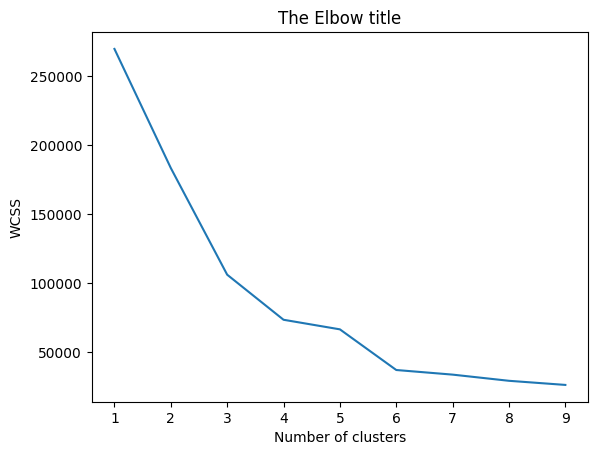

In [ ]:
from sklearn.cluster import KMeans

#for each cluster number, the method will compute WCSS
WCSS = []#empty list

for i in range(1,10): #1-9
  kmeans = KMeans(i)#instantiating k means method
  kmeans.fit(malldata)#fitting kmeans on data
  wcc_iter = kmeans.inertia_#extract WCSS value for each cluster assignment
  WCSS.append(wcc_iter)

plt.plot(range(1,10), WCSS)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)#4 clusters

kmeans.fit(malldata)

KMeans(n_clusters=5)

In [ ]:
kmeans.predict(malldata)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
identified_clusters = kmeans.fit_predict(malldata)

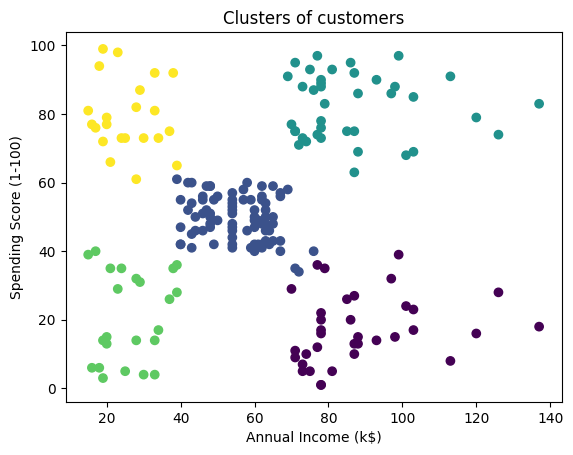

In [ ]:
plt.scatter(malldata['Annual Income (k$)'], malldata['Spending Score (1-100)'], c = identified_clusters)

plt.title('Clusters of customers')
# labelling the x-axis
plt.xlabel('Annual Income (k$)')
# label of the y-axis
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

Hierarchical Clustering

all data points are individual cluster in the beginning,

In [ ]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram

dendrogram = sch.dendrogram(sch.linkage(malldata, method = "ward")) # finding the optimal number of clusters using dendrogram

plt.title('Dendrogram') # title of the dendrogram
plt.xlabel('Customers') # label of the x-axis
plt.ylabel('Euclidean distances') # label of the y-axis
plt.show() # show the dendrogram

In [ ]:
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
'''
we need to create an AgglomerativeClustering object, and in it, we pass the following parameters:
n_cluster= 5, the number of clusters our model should return
affinity=euclidean, specify metric to be used to calculate distances
linkage= ward to regulate how distance calculation will be carried out between different clusters.
'''
Agg_hc = AgglomerativeClustering(n_clusters =5 , metric = 'euclidean', linkage = 'ward')
Agg_hc.fit_predict(malldata) # model fitting on the dataset

In [ ]:
plt.scatter(malldata['Annual Income (k$)'], malldata['Spending Score (1-100)'], c=Agg_hc.labels_)

plt.title('Clusters of customers')
# labelling the x-axis
plt.xlabel('Annual Income (k$)')
# label of the y-axis
plt.ylabel('Spending Score (1-100)')

# show the plot
plt.show()

How DBSCAN Works

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

It groups points that are closely packed together (dense regions).

Points in low-density regions are labeled as outliers/noise.

Two key parameters:

ε (epsilon): Maximum distance between two samples for them to be considered neighbors.

MinPts: Minimum number of points required to form a dense region (cluster).

Advantage: Unlike K-Means, DBSCAN does not require specifying the number of clusters and can discover clusters of arbitrary shape.

Limitation: Choosing the right ε is tricky and DBSCAN struggles with varying density clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Scale the features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(malldata)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataset
malldata['DBSCAN_Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(malldata['Annual Income (k$)'], malldata['Spending Score (1-100)'],
            c=malldata['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using DBSCAN')
plt.colorbar(label="Cluster ID")
plt.show()

# Show unique cluster IDs found
malldata['DBSCAN_Cluster'].value_counts()


In [ ]:
# Try tuning eps and min_samples to see effect on cluster formation

results = {}

# Different parameter settings
params = [(0.3, 4), (0.4, 5), (0.6, 5), (0.8, 10), (1.0, 10)]
for eps, min_samples in params:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_scaled)
    results[(eps, min_samples)] = pd.Series(labels).value_counts().to_dict()

results


eps=0.3, min_samples=4

8 clusters formed (Cluster sizes: 88, 32, 16, 14, 9, 8, 7, 3)

23 noise points

Very fragmented → DBSCAN over-splits the data.

eps=0.4, min_samples=5

4 clusters (115, 32, 27, 11)

15 noise points

This looks like a good balance (more natural segmentation).

eps=0.6, min_samples=5

Only 1 cluster (195) + 5 noise points → DBSCAN merges almost everything.

eps=0.8, min_samples=10

Same issue: 1 big cluster (196) + 4 noise.

eps=1.0, min_samples=10

All customers merged into 1 big cluster (200) → no segmentation.

In [ ]:
# Apply DBSCAN with tuned parameters (best setting found)
dbscan_tuned = DBSCAN(eps=0.4, min_samples=5)
clusters_tuned = dbscan_tuned.fit_predict(X_scaled)

# Add tuned cluster labels
malldata['DBSCAN_Tuned_Cluster'] = clusters_tuned

# Visualize tuned clusters
plt.figure(figsize=(8,6))
plt.scatter(malldata['Annual Income (k$)'], malldata['Spending Score (1-100)'],
            c=malldata['DBSCAN_Tuned_Cluster'], cmap='tab10', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using DBSCAN (eps=0.4, min_samples=5)')
plt.colorbar(label="Cluster ID")
plt.show()

# Show cluster sizes
malldata['DBSCAN_Tuned_Cluster'].value_counts()
